<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE256-AdvDataMining/blob/main/starbucks/Starbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement: Starbucks wants to offer sales coupons to customers based on time visit to the store.

##Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist
from scipy.spatial import distance_matrix 
import seaborn as sns
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

##Using Hierarchical clustering (Agglomerative-single link, average link, complete link) to solve the problem statement.

##Reading data into dataframe

In [ ]:
starbucks = pd.read_csv('/content/starbucks.csv') # read the data
starbucks.head()

,PTIndex,HBIndex
0,1,5
1,1,7
2,2,6
3,2,9
4,3,6


##Scatterplot to see the the customers choice of beverage vs popular times on wednesday when starbucks is crowded

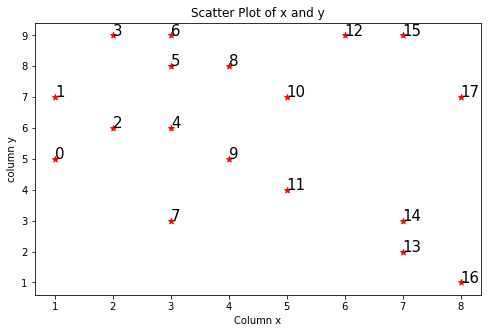

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(starbucks['PTIndex'], starbucks['HBIndex'], c='r', marker='*')
plt.xlabel('Column x')
plt.ylabel('column y')
plt.title('Scatter Plot of x and y') 
for j in starbucks.itertuples():
    plt.annotate(j.Index, (j.PTIndex, j.HBIndex), fontsize=15)

##Get three clusters of popular times on a wednesday to find the cluster that has maximum number of customers during that time as Starbucks wants maximum three popular time slots of the day to offer coupon.

##Determining the optimal number of clusters using silhouette

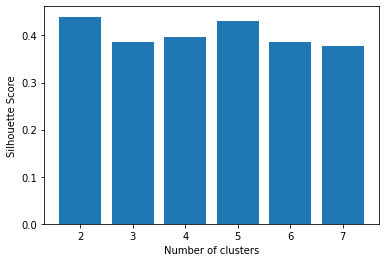

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(starbucks, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(starbucks))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

##Using single link technique to solve

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
clustering_model.fit(starbucks)
clustering_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1])

Text(0.5, 1.0, 'data points')

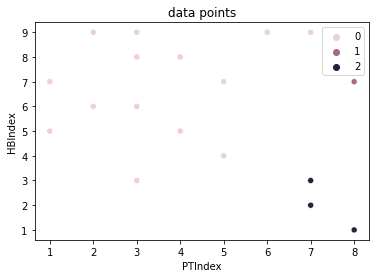

In [ ]:
data_labels = clustering_model.labels_
sns.scatterplot(x='PTIndex', 
                y='HBIndex', 
                data=starbucks, 
                hue=data_labels,
                ).set_title('data points')

In [ ]:
single_agg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3,
                        )
single_agg.fit(starbucks)

AgglomerativeClustering(linkage='single', n_clusters=3)

##Visualizing clusters, Single link fits the data in two clusters. 7:00am-12:00 and 1:00-4:00 looks popular times to distribute the coupons. 

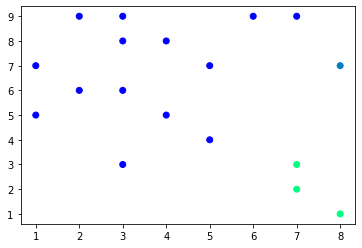

In [ ]:
plt.scatter(starbucks['PTIndex'], starbucks['HBIndex'],  
           c = single_agg.fit_predict(starbucks), cmap =plt.cm.winter) 
plt.show() 

##Dendogram of single link starbucks clusters

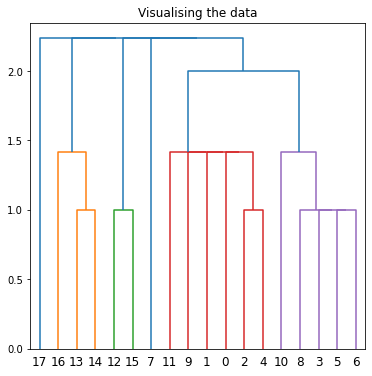

In [ ]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(starbucks, method ='single'))) 

##Using Average link technique to solve

In [ ]:
Average_agg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        )
Average_agg.fit(starbucks)

AgglomerativeClustering(linkage='average', n_clusters=3)

##Visualizing clusters. According to average link clustering, popular times are 6:00 am - 12:00 noon is the best time amongst three clusters to distribute coupons.

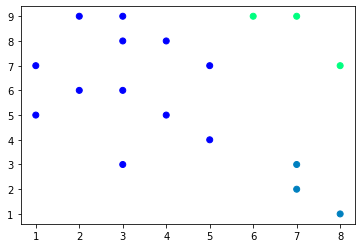

In [ ]:
plt.scatter(starbucks['PTIndex'], starbucks['HBIndex'],  
           c = Average_agg.fit_predict(starbucks), cmap =plt.cm.winter) 
plt.show() 

##Dendogram for Average link clusters

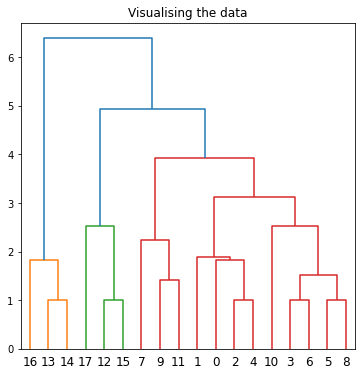

In [ ]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(starbucks, method ='average'))) 

##Using complete link technique to solve

In [ ]:
complete_agg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        )
Average_agg.fit(starbucks)

AgglomerativeClustering(linkage='average', n_clusters=3)

##Visualizing clusters. According to average link clustering, popular times are 6:00 am - 9:00, 10:00-1:00 ,3:00-7:00 are best time to distribute coupons.

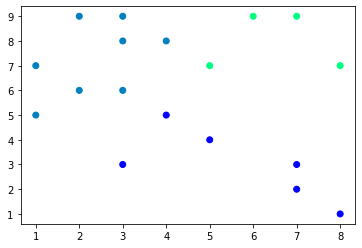

In [ ]:
plt.scatter(starbucks['PTIndex'], starbucks['HBIndex'],  
           c = complete_agg.fit_predict(starbucks), cmap =plt.cm.winter) 
plt.show() 

##Dendogram for complete link clusters

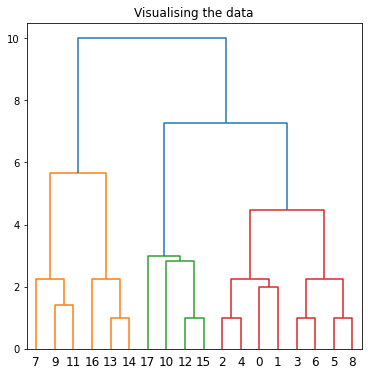

In [ ]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(starbucks, method ='complete'))) 